# **Importation**

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import files
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('/content/vietnam_housing_dataset.csv')

In [3]:
print(df.head())

                                             Address  Area  Frontage  \
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0       NaN   
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0       NaN   
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0       6.0   
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0       NaN   
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0       NaN   

   Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0          NaN             NaN               NaN     4.0       NaN        NaN   
1          NaN             NaN               NaN     5.0       NaN        NaN   
2         13.0      Đông - Bắc        Đông - Bắc     5.0       NaN        NaN   
3          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4          NaN      Đông - Nam        Đông - Nam     2.0       4.0        4.0   

       Legal status Furniture state  Price  
0  Have certificate             NaN

In [4]:
missing_values = df.isnull().sum()

In [5]:
print(missing_values)

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64


# **Handle missing values**

In [6]:
numeric_cols = ['Frontage', 'Floors', 'Bedrooms', 'Bathrooms', 'Access Road']
categorical_cols = ['House direction', 'Balcony direction', 'Legal status', 'Furniture state']
target_col = ['Price']

Categorical features : imputation using most frequent

In [7]:
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

In [8]:
print(df[categorical_cols].head(4))

  House direction Balcony direction      Legal status Furniture state
0      Đông - Nam        Đông - Nam  Have certificate            Full
1      Đông - Nam        Đông - Nam  Have certificate            Full
2      Đông - Bắc        Đông - Bắc     Sale contract            Full
3       Tây - Nam         Tây - Nam  Have certificate            Full


Numeric features : imputation using KNN

In [9]:
knn_imputer = KNNImputer(n_neighbors=5)  # You can change the number of neighbors as needed
df[numeric_cols] = knn_imputer.fit_transform(df[numeric_cols])

In [10]:
print(df[numeric_cols].head(4))

   Frontage  Floors  Bedrooms  Bathrooms  Access Road
0      4.47     4.0       4.2        4.4         12.4
1      4.18     5.0       4.4        4.6          3.8
2      6.00     5.0       4.6        4.2         13.0
3      5.07     2.0       2.0        3.0          3.5


In [11]:
print(df.isnull().sum())

Address              0
Area                 0
Frontage             0
Access Road          0
House direction      0
Balcony direction    0
Floors               0
Bedrooms             0
Bathrooms            0
Legal status         0
Furniture state      0
Price                0
dtype: int64


Display clean data

In [12]:
print(df.head(5))

                                             Address  Area  Frontage  \
0  Dự án The Empire - Vinhomes Ocean Park 2, Xã L...  84.0      4.47   
1  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  60.0      4.18   
2  Dự án The Crown - Vinhomes Ocean Park 3, Xã Ng...  90.0      6.00   
3  Đường Nguyễn Văn Khối, Phường 11, Gò Vấp, Hồ C...  54.0      5.07   
4   Đường Quang Trung, Phường 8, Gò Vấp, Hồ Chí Minh  92.0      5.06   

   Access Road House direction Balcony direction  Floors  Bedrooms  Bathrooms  \
0         12.4      Đông - Nam        Đông - Nam     4.0       4.2        4.4   
1          3.8      Đông - Nam        Đông - Nam     5.0       4.4        4.6   
2         13.0      Đông - Bắc        Đông - Bắc     5.0       4.6        4.2   
3          3.5       Tây - Nam         Tây - Nam     2.0       2.0        3.0   
4          7.0      Đông - Nam        Đông - Nam     2.0       4.0        4.0   

       Legal status Furniture state  Price  
0  Have certificate            Full

# **Outliers**

**Outliers for numeric data**


1.   Detect Outliers using Z-Score
2.   Detect Outliers using IQR



Z-Score

In [13]:
z_scores = np.abs(stats.zscore(df[numeric_cols]))

In [14]:
threshold = 3
outliers = np.where(z_scores > threshold)

In [15]:
for col in numeric_cols:
    col_z_scores = np.abs(stats.zscore(df[col]))
    outliers_in_col = df[col][col_z_scores > threshold]
    print(f"Outliers in column '{col}':")
    print(outliers_in_col)
    print("\n")

Outliers in column 'Frontage':
37       17.0
85       20.0
328      36.0
395      21.7
423      17.0
         ... 
29903    48.0
30097    17.0
30134    20.0
30148    33.0
30187    30.0
Name: Frontage, Length: 262, dtype: float64


Outliers in column 'Floors':
11364    10.0
14929     8.0
15932     9.0
16184     8.0
29568     8.0
Name: Floors, dtype: float64


Outliers in column 'Bedrooms':
201      8.0
234      8.0
273      8.0
318      9.0
365      9.0
        ... 
29982    9.0
29999    8.0
30034    8.0
30044    9.0
30160    9.0
Name: Bedrooms, Length: 407, dtype: float64


Outliers in column 'Bathrooms':
318      9.0
343      8.0
365      8.0
812      8.0
816      9.0
        ... 
29936    9.0
29982    9.0
29999    9.0
30044    9.0
30160    9.0
Name: Bathrooms, Length: 318, dtype: float64


Outliers in column 'Access Road':
16       32.0
37       36.0
47       30.0
60       29.0
90       33.0
         ... 
30182    36.0
30187    30.0
30199    75.0
30201    32.0
30216    40.0
Name: Acc

IQR method

In [16]:
# Iterate over all numeric columns to find outliers using the IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f"Outliers in column '{col}':")
    print(outliers_in_col)
    print("\n")


Outliers in column 'Frontage':
16       15.00
24       15.00
37       17.00
46       13.04
47        9.74
         ...  
30196    14.00
30201    15.00
30206     8.00
30207    14.00
30219    13.04
Name: Frontage, Length: 2204, dtype: float64


Outliers in column 'Floors':
11364    10.0
14929     8.0
15932     9.0
16184     8.0
29568     8.0
Name: Floors, dtype: float64


Outliers in column 'Bedrooms':
8        6.0
10       6.0
11       6.0
16       6.0
20       7.0
        ... 
30163    7.0
30191    1.0
30195    1.0
30196    1.0
30201    7.0
Name: Bedrooms, Length: 2579, dtype: float64


Outliers in column 'Bathrooms':
318      9.0
343      8.0
365      8.0
404      7.0
423      7.0
        ... 
30023    7.0
30034    6.8
30044    9.0
30160    9.0
30163    7.0
Name: Bathrooms, Length: 644, dtype: float64


Outliers in column 'Access Road':
7        18.0
16       32.0
17       17.0
18       20.0
37       36.0
         ... 
30182    36.0
30187    30.0
30199    75.0
30201    32.0
30216    4

# **Handle Outliers**

Cap or Trim Outliers (Winsorization) : This keeps the outliers but reduces their influence by setting them to a more reasonable value.

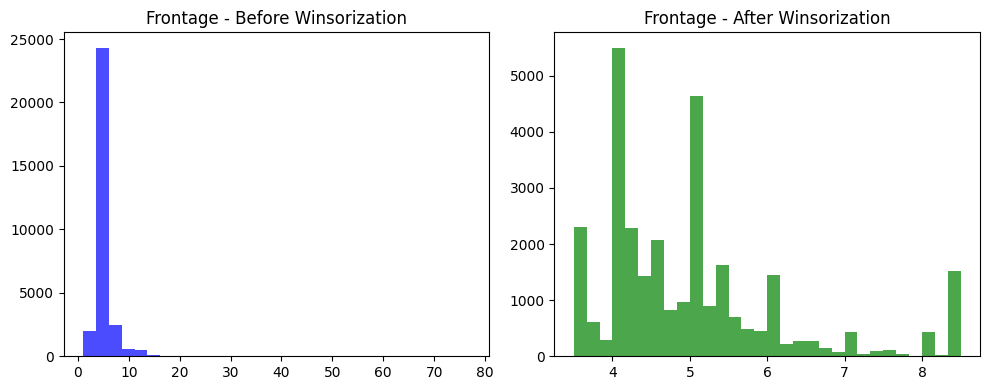

<Figure size 640x480 with 0 Axes>

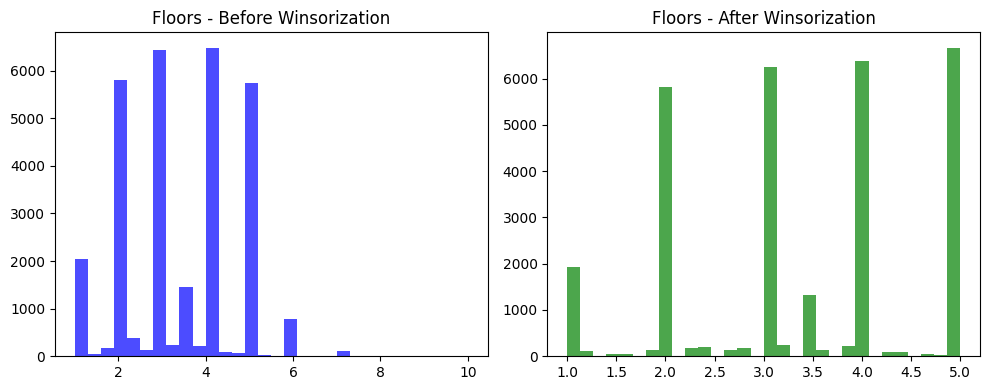

<Figure size 640x480 with 0 Axes>

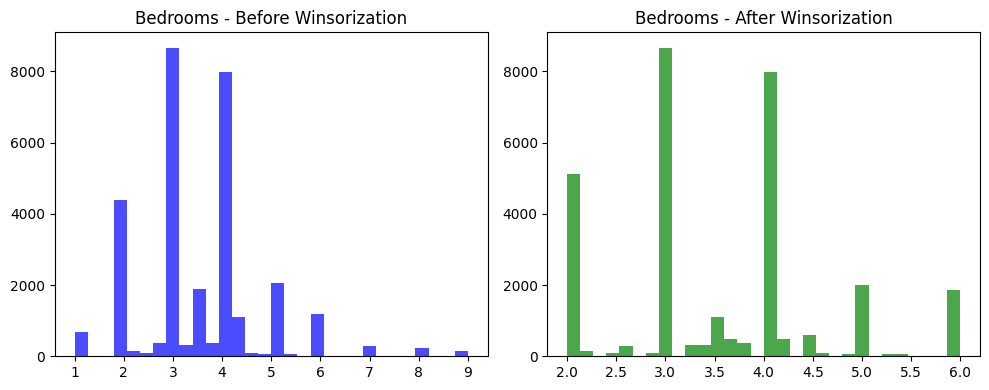

<Figure size 640x480 with 0 Axes>

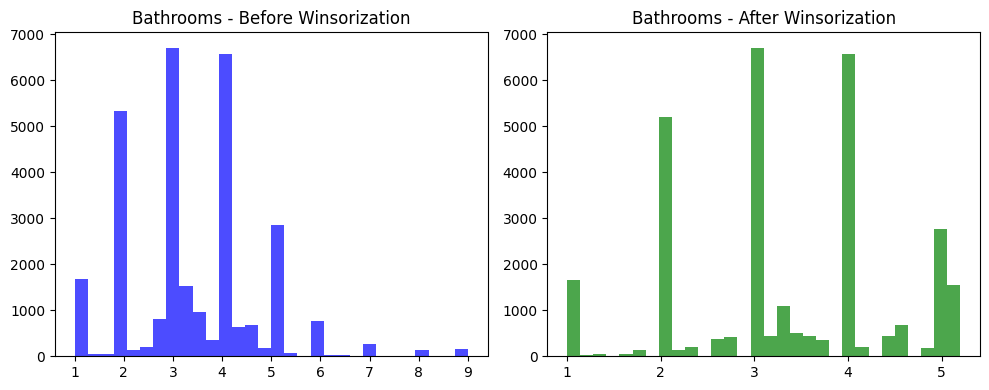

<Figure size 640x480 with 0 Axes>

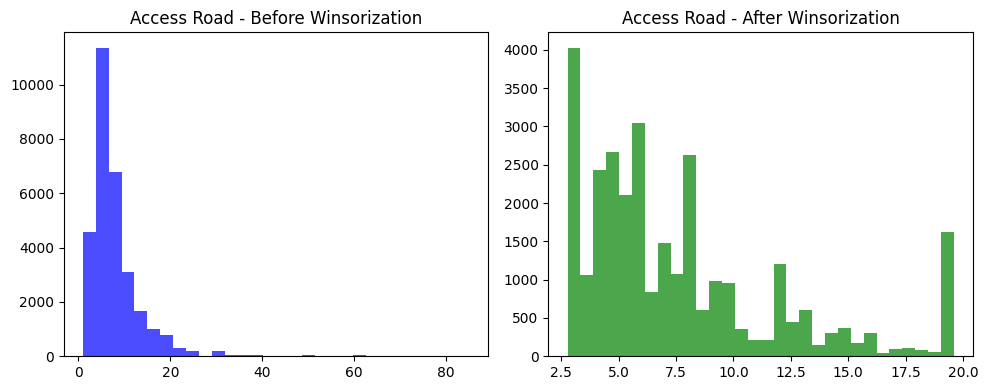

<Figure size 640x480 with 0 Axes>

In [18]:
for col in numeric_cols:
    # Plot the original distribution
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'{col} - Before Winsorization')

    # Apply Winsorization to the column (capping at 5th and 95th percentiles)
    winsorized_col = winsorize(df[col], limits=[0.05, 0.05])

    # Plot the Winsorized distribution
    plt.subplot(1, 2, 2)
    plt.hist(winsorized_col, bins=30, alpha=0.7, color='green')
    plt.title(f'{col} - After Winsorization')

    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()

In [19]:
df[col] = winsorized_col

# **Save Cleaned data**

In [20]:
df.to_csv('vietnam_housing_dataset_clean_data.csv', index=False, encoding='utf-8-sig')

In [ ]:
files.download('vietnam_housing_dataset_clean_data.csv')